In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ny = pd.read_csv('NYtemp.csv', index_col=0)
ny.isnull().any()

date                    False
min                      True
max                      True
normal_min              False
normal_max              False
precipitation           False
precipitation_normal    False
dtype: bool

In [3]:
ny.dropna(subset = ['min','max'], inplace = True)
ny.isnull().any()

date                    False
min                     False
max                     False
normal_min              False
normal_max              False
precipitation           False
precipitation_normal    False
dtype: bool

In [4]:
ny['date'].dtype

dtype('int64')

In [5]:
ny['date'] = ny['date'].astype('str')

In [6]:
ny['date'] = pd.to_datetime(ny['date'])
ny['date'].dtype

dtype('<M8[ns]')

In [7]:
ny

,date,min,max,normal_min,normal_max,precipitation,precipitation_normal
0,1869-01-01,19.0,29.0,29.8,40.6,0.75,0.12
1,1869-01-02,21.0,27.0,29.6,40.4,0.78,0.24
2,1869-01-03,27.0,35.0,29.4,40.3,0.78,0.35
3,1869-01-04,34.0,37.0,29.2,40.1,0.96,0.48
4,1869-01-05,37.0,43.0,29.0,40.0,1.01,0.60
...,...,...,...,...,...,...,...
55997,2022-04-26,52.0,60.0,49.2,66.0,14.44,14.65
55998,2022-04-27,41.0,58.0,49.5,66.3,14.44,14.79
55999,2022-04-28,40.0,58.0,49.8,66.6,14.44,14.93
56000,2022-04-29,41.0,63.0,50.1,66.9,14.44,15.08


In [8]:
ny_no2022 = ny[ny['date'] != 2022]

In [9]:
ny_no2022['average temp'] = (ny_no2022['max'] + ny_no2022['min'])/2

In [10]:
ny_no2022.head()

,date,min,max,normal_min,normal_max,precipitation,precipitation_normal,average temp
0,1869-01-01,19.0,29.0,29.8,40.6,0.75,0.12,24.0
1,1869-01-02,21.0,27.0,29.6,40.4,0.78,0.24,24.0
2,1869-01-03,27.0,35.0,29.4,40.3,0.78,0.35,31.0
3,1869-01-04,34.0,37.0,29.2,40.1,0.96,0.48,35.5
4,1869-01-05,37.0,43.0,29.0,40.0,1.01,0.60,40.0


Text(0.5, 0, 'Year')

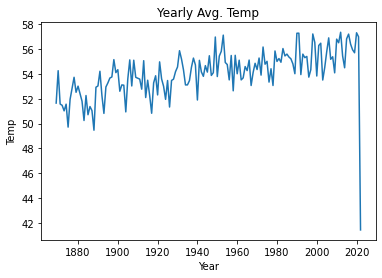

In [11]:
ax = ny_no2022.groupby(ny_no2022['date'].dt.year)['average temp'].mean().plot()
ax.set_title('Yearly Avg. Temp')
ax.set_ylabel('Temp')
ax.set_xlabel('Year')

In [12]:
_18y = ny_no2022[ny_no2022['date'].dt.year < 1900]
_19y = ny_no2022[(ny_no2022['date'].dt.year>= 1900) & ny_no2022['date'].dt.year < 2000]
_20y = ny_no2022[ny_no2022['date'].dt.year> 2000]

Text(0.5, 0, 'Month')

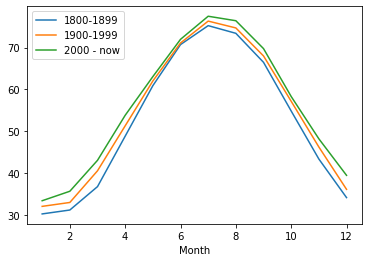

In [13]:
ax = _18y.groupby(_18y['date'].dt.month)['average temp'].mean().plot(label = '1800-1899')
ax = _19y.groupby(_19y['date'].dt.month)['average temp'].mean().plot(label = '1900-1999')
ax = _20y.groupby(_20y['date'].dt.month)['average temp'].mean().plot(label ='2000 - now')
ax.legend()
ax.set_xlabel('Month')

In [14]:
heart = pd.read_csv('heart_2020.csv')

In [15]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Text(0, 0.5, 'Avg BMI')

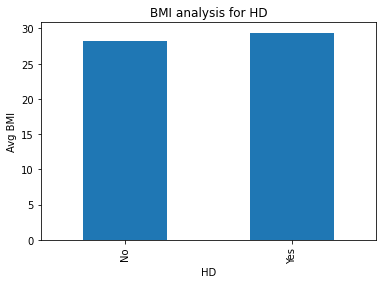

In [16]:
ax = heart.groupby('HeartDisease')['BMI'].mean().plot.bar()
ax.set_title('BMI analysis for HD')
ax.set_xlabel('HD')
ax.set_ylabel('Avg BMI')

In [17]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [18]:
h = heart[heart['HeartDisease'] == 'Yes']
ct = pd.crosstab(h['AgeCategory'],h['Race'])

<AxesSubplot:ylabel='AgeCategory'>

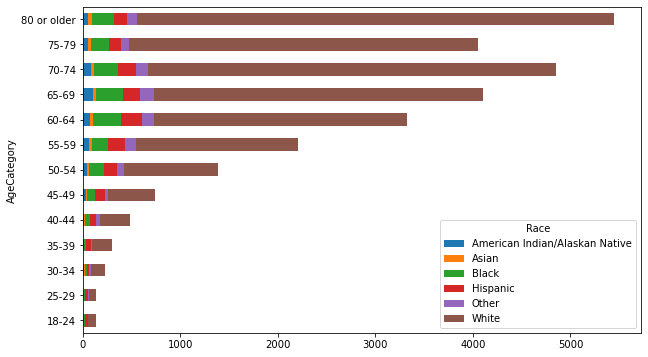

In [19]:
ct.plot.barh(stacked = True, figsize = (10,6))

In [20]:
data1 = heart[heart['HeartDisease']=='Yes']
ct1=pd.crosstab(data1['Sex'],data1['AgeCategory'])

In [21]:
data2 = heart[heart['Stroke']=='Yes']
ct2=pd.crosstab(data2['Sex'],data2['AgeCategory'])

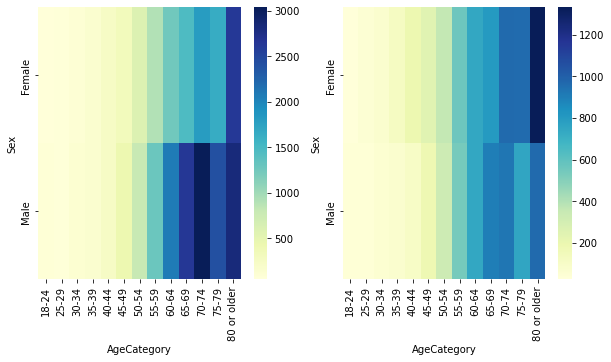

In [22]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
ax1 = sns.heatmap(ct1,ax = axes[0], cmap='YlGnBu')
ax2 = sns.heatmap(ct2, ax = axes[1], cmap = 'YlGnBu')

<AxesSubplot:ylabel='Frequency'>

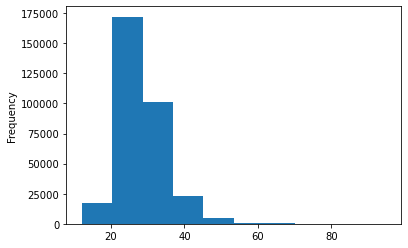

In [24]:
heart['BMI'].plot.hist(bins=10)

<AxesSubplot:ylabel='Density'>

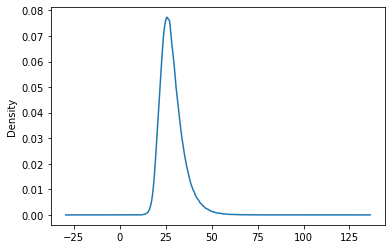

In [25]:
heart['BMI'].plot.density()

/Users/rahulreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

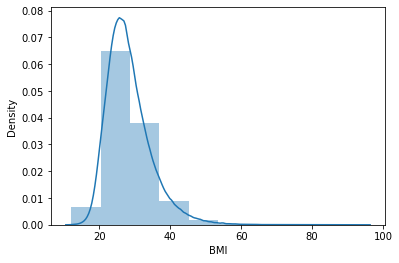

In [26]:
sns.distplot(heart['BMI'], bins =10)

In [28]:
heart[['BMI','PhysicalHealth','MentalHealth','SleepTime']].corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [29]:
#Q9
from sklearn import datasets

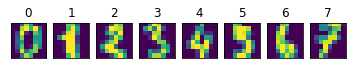

In [31]:
import numpy
digits = datasets.load_digits()   #get the dataset
digits.keys()  #display the keys in the data
digits.data.shape  # display the shape of the data. You will see (1797, 64) which means 1792 images, each one is 64 numbers/pixels 
digits.data  # you will see the data values
numpy.unique(digits.target)   #you will see the target valuess (answers)
digits.target.shape  #it also has 1797 answers 
images = digits.images
target = digits.target
#The following statements will show 8 photos and their answers: 
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(8):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    #ax.imshow(images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.imshow(images[i])
    # label the image with the target value
    #ax.text(0, 7, str(target[i]))
    ax.set_title(str(target[i]))

# Show the plot
plt.show()


In [32]:
data = digits.data

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/rahulreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
lr.score(x_test,y_test)

0.9648148148148148

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
knn.score(x_test,y_test)

0.9944444444444445